In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


In [54]:
df = pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [55]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [56]:
updated_df = df.copy()
updated_df.columns = updated_df.columns.str.strip()

updated_df['CRIM'].fillna(updated_df['CRIM'].mean(), inplace=True)
updated_df['ZN'].fillna(updated_df['ZN'].mean(), inplace=True)
updated_df['INDUS'].fillna(updated_df['INDUS'].mean(), inplace=True)
updated_df['CHAS'].fillna(updated_df['CHAS'].mean(), inplace=True)
updated_df['AGE'].fillna(updated_df['AGE'].mean(), inplace=True)


#Deleting Columns 
updated_df.drop('LSTAT',axis=1,inplace=True)
print(updated_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree 
import matplotlib.pyplot as plt 

x = updated_df.iloc[:,[0,1,2,3]].values
y = updated_df.iloc[:, -1 ].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=42)

dt = DecisionTreeRegressor(criterion='squared_error',max_depth=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

Mean Absolute Error: 4.678849261478014


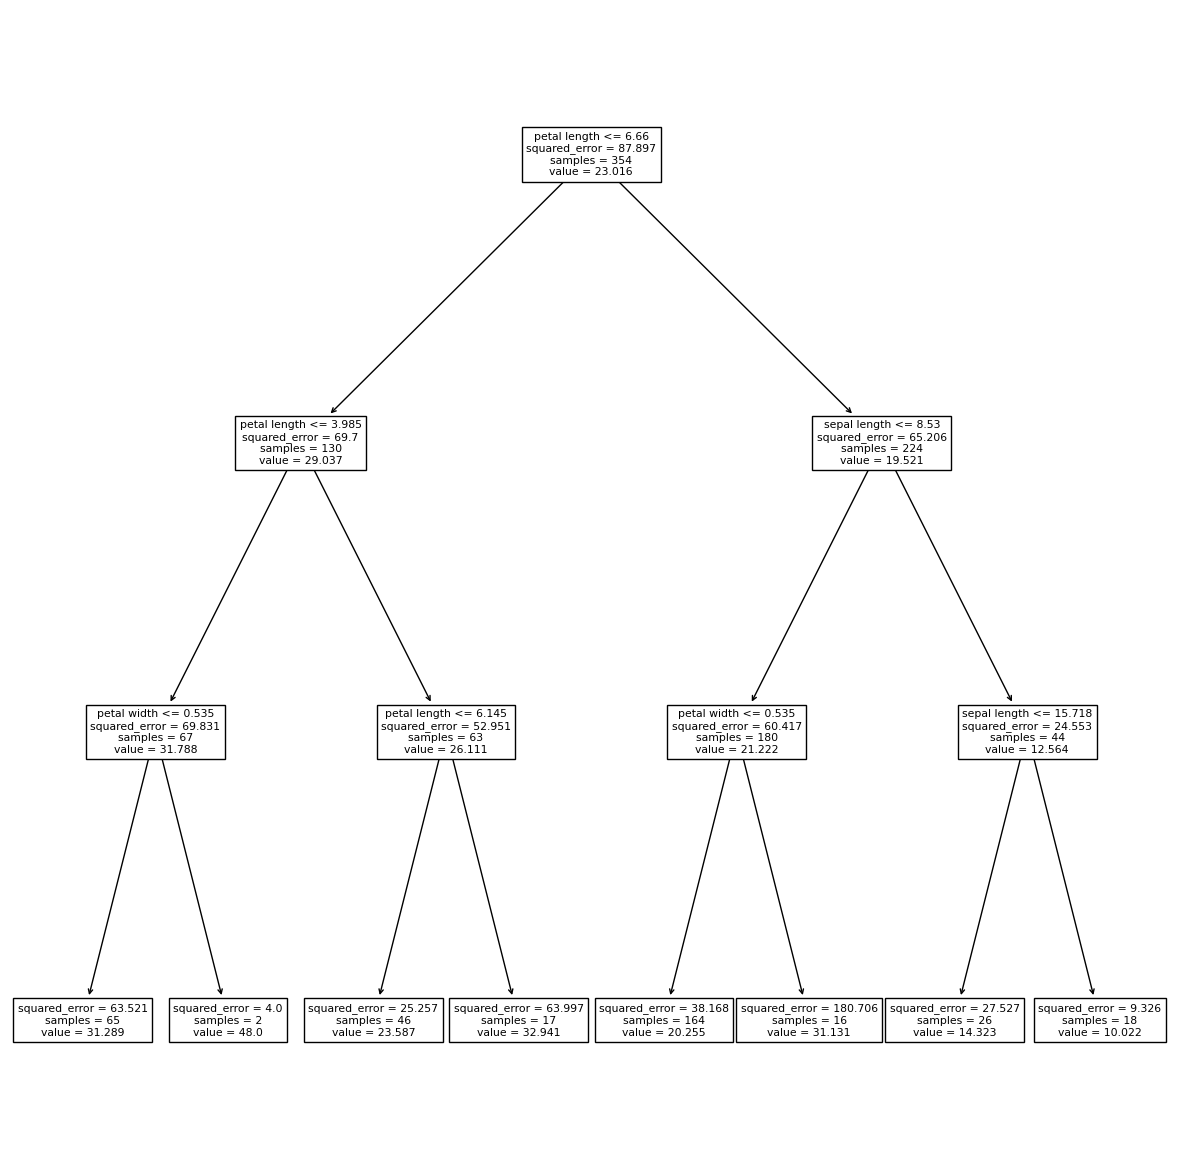

In [58]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

fig, ax = plt.subplots(figsize=(15, 15)) 
tree.plot_tree(dt,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()